In [11]:
#importing datasets
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [12]:

fashion_mnist=tf.keras.datasets.fashion_mnist
#(X_train,Y_train) ,(X_test,Y_test) =mnist.load_data()
#load the data

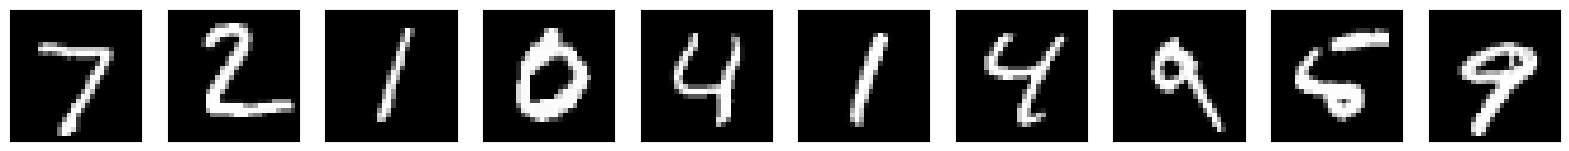

In [13]:
#display datasets
import matplotlib.pyplot as plt
#no of digits to display
n=10
#create a figure to display image
plt.figure (figsize=(20,4))
#loop through the first n images
for i in range(n):

  #display original
  #create subplot to display within the figure
  ax=plt.subplot(2,n,i+1)
  #display the orignial shape
  plt.imshow(X_test[i].reshape(28,28))
  #set colour map of gray scale
  plt.gray()
  #hide x_axis and y_axis label and ticks
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #show the figure within the image
plt.show()
#close the figure
plt.close()

In [ ]:
#flatenning the image
print("Previous shape of X_train shape :{} \nPrevious Y_train shape: {}" .format(X_train.shape,Y_train.shape))
#reshape the trainnig data and testing data to a flat format
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

Previous shape of X_train shape :(60000, 28, 28) 
Previous Y_train shape: (60000,)


In [ ]:
#min-max scaling
#convert the data type of image to float32
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
#normalizze the pixel values to range btw 0 to 1
X_train /=255
X_test /=255




In [ ]:
#training the data
#no of classes
classes=10
#convert the label into one hot encoded format
Y_train = to_categorical(Y_train,classes)
Y_test = to_categorical(Y_test,classes)
#print the shape of preprocessing the trained data and labels
print("new X_tain shape: {} \nprevious Y_train shape {} ".format(X_train.shape , Y_train.shape))

new X_tain shape: (60000, 784) 
previous Y_train shape (60000, 10) 


In [ ]:
#hyper parameters
#define the input size of each parameter
input_size=784
#specify the no of each dataset
batch_size=200
#define the no of neurons in 1 hidden layer
hidden1=400
#define the no of neuron in 2 hidden layer
hidden2=20
#define the total no of classes in each dataset
classes=10
#set the no of complete passes through dataset during training
epochs=5


In [ ]:
#building the FCN model
#build the model
#create a sequential model which allow us to build a neural network layer by layer
model=Sequential()
#add the first hidden layer in 'hidden1' nerons using relu activation function
#the input_diim specifies the size of input layer
model.add(Dense(hidden1,input_dim=input_size,activation='relu'))
#utput=relu(dot(w,input)+biss)
#add the second hidden layer in 'hidden2' nerons using relu activation function
model.add(Dense(hidden2,activation='relu'))
#add the output layer with 'classes' neurons using softmax activation function
#softmax ensures that outpu value of probablities of each 01
model.add(Dense(classes,activation='softmax'))
#compilation
#complie the model by specifying the loss functions , optimizer ,evaluation metrices
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],optimizer='sgd')
#dipaly the model summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#import neccesary libraries
from time import time
#record the current time to measure training time
tic=time()
#fit the model on training data
model.fit(X_train,Y_train , batch_size=batch_size ,epochs=epochs , verbose=1)
#reocrd the time after training model
toc=time()
#calculate and print time taken for model training
print("model training took {}  secs" .format(tic-toc))
#testing the trained model
#tested

Epoch 1/5
300/300 [==============================] - 3s 8ms/step - loss: 1.6818 - accuracy: 0.4989
Epoch 2/5
300/300 [==============================] - 2s 8ms/step - loss: 0.7545 - accuracy: 0.8260
Epoch 3/5
300/300 [==============================] - 2s 8ms/step - loss: 0.4963 - accuracy: 0.8712
Epoch 4/5
300/300 [==============================] - 3s 10ms/step - loss: 0.4108 - accuracy: 0.8899
Epoch 5/5
300/300 [==============================] - 3s 9ms/step - loss: 0.3665 - accuracy: 0.8993
model training took -21.557018756866455  secs


In [ ]:
#import libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#predict probablities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

#calculate the print the test accuracy
test_accuracy = accuracy_score(y_pred, Y_test)  #accuracy check on unseen data
print("\nTest accuracy: {}".format(test_accuracy))

313/313 [==============================] - 1s 3ms/step

Test accuracy: 0.873


In [ ]:
mask = range(20, 50)
x_valid = X_test[0:20]  # Corrected the slicing here
actual_labels = Y_test[0:20]  # Corrected the slicing here
y_pred_probs_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 22ms/step


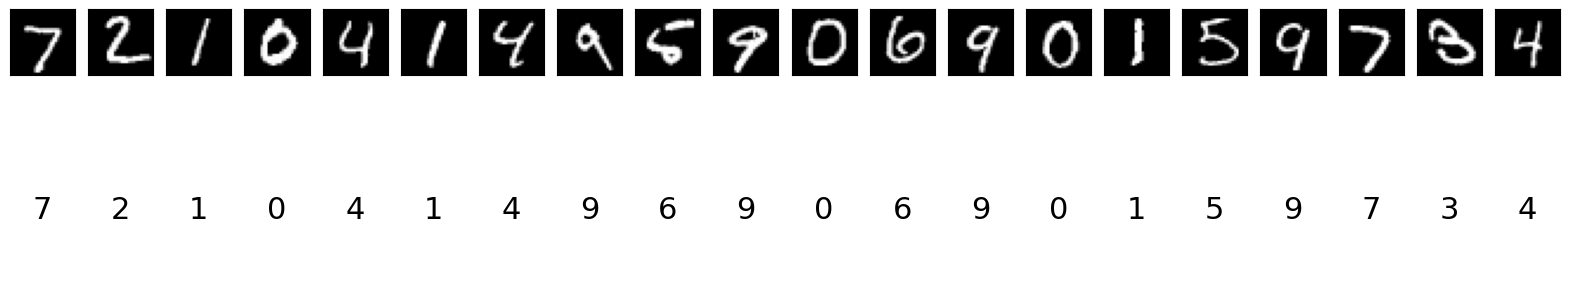

In [ ]:
import matplotlib.pyplot as plt

n = len(x_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_valid[i].reshape(28, 28), cmap='gray')  # Added cmap parameter to specify grayscale
    ax.get_xaxis().set_visible(False)  # Corrected the method name
    ax.get_yaxis().set_visible(False)  # Corrected the method name

    # Display predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=22, ha='center', va='center')
    plt.axis('off')

plt.show()  # Moved plt.show() outside the loop
